In [ ]:
using DelimitedFiles
using Flux: onehot, onecold, logitcrossentropy, onehotbatch, crossentropy 
using Flux

In [ ]:
rawdata = readdlm("data/data1.csv",',',skipstart=1)'

In [ ]:
x = rawdata[1:11, :]
y = rawdata[12, :];

x_train = x[:,1:floor(Int, size(x,2)*0.7)]
y_train = y[1:floor(Int, size(x,2)*0.7)]
x_test = x[:,floor(Int, size(x,2)*0.7)+1:end]
y_test = y[floor(Int, size(x,2)*0.7)+1:end];


In [ ]:
train_data = [ (x, onehot(l, unique(y_train))) for (x, l) in zip(eachcol(x_train), y_train)]
test_data = [ (x, onehot(l, unique(y_test))) for (x, l) in zip(eachcol(x_test), y_test)];

In [ ]:
inputSize = 11
outputSize = 6

In [ ]:
model2 = Chain(Dense(inputSize, 2*inputSize, sigmoid), Dense(2*inputSize, outputSize))#define the model 


In [ ]:
accuracy(model,x,y) = sum(onecold(model(x)) .== onecold(y))/size(x,2)
accuracy(xy, model) = mean( onecold(model(x)) .== onecold(y) for (x,y) in xy)

loss(model) = (x,y)->Flux.logitcrossentropy(model(x), y)
loss(model,x,y) = loss(model)(x, y)
loss(xy, model) = loss(model)(hcat(map(first,xy)...), hcat(map(last,xy)...))


In [ ]:
Flux.train!(loss(model2), Flux.params(model2), train_data, ADAM(1e-4))

In [60]:
using JLD2
using Plots

ABCsave_resultTrain = JLD2.load_object("result/ABCsave_resultTrain.jld2");
ABCsave_resultTest = JLD2.load_object("result/ABCsave_resultTest.jld2");
BPsave_resultTrain = JLD2.load_object("result/BPsave_resultTrain.jld2");
BPsave_resultTest = JLD2.load_object("result/BPsave_resultTest.jld2");
PSOsave_resultTrain = JLD2.load_object("result/PSOsave_resultTrain.jld2");
PSOsave_resultTest = JLD2.load_object("result/PSOsave_resultTest.jld2");



In [62]:
for i = 1:6
    plot!((1:10000), ABCsave_resultTrain[i],label = "train"*string(i))
    plot!((1:10000), ABCsave_resultTest[i],label = "test"*string(i))
end
plot!( title = "DataSet2 ABC Accuracy", legend = :outertopleft)


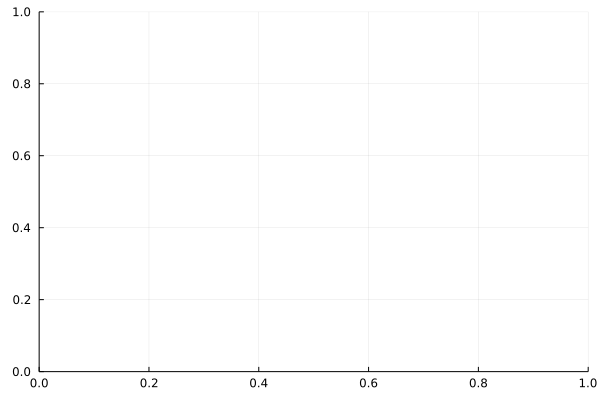

In [73]:
plot()

In [ ]:
plot((1:5000), PSOsave_resultTrain)

In [ ]:
# plot!((1:5000), BPsave_resultTrain,label = "BP")
# plot!((1:5000), BPsave_resultTest,label = "BP",title = "DataSet2 BP Accuracy", legend = :outertopleft)


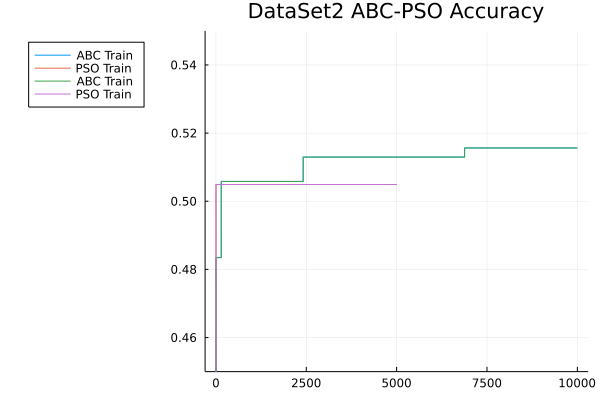

In [71]:
plot!((1:10000), ABCsave_resultTrain[4],label = "ABC Train")
plot!((1:5000), ylim=(0.45, 0.55),PSOsave_resultTrain,label = "PSO Train",title = "DataSet2 ABC-PSO Accuracy", legend = :outertopleft)


In [ ]:
plot!((1:10000), ABCsave_resultTest[6],label = "ABC Test")

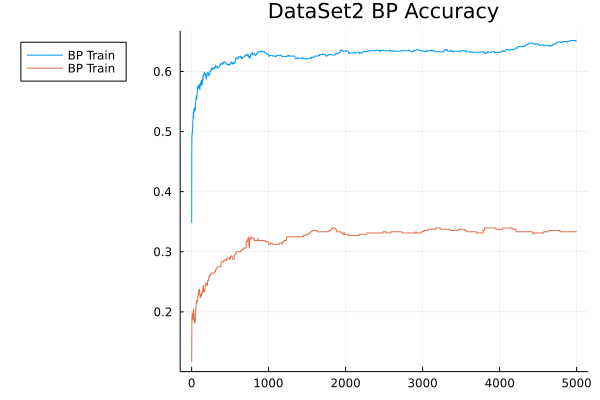

In [74]:
plot!((1:5000), BPsave_resultTrain,label = "BP Train",title = "DataSet2 BP Accuracy", legend = :outertopleft)
plot!((1:5000), BPsave_resultTest,label = "BP Train",title = "DataSet2 BP Accuracy", legend = :outertopleft)
